In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize as min

In [2]:
x0 = np.array([4., 0.])
x1 = np.array([3., 1.])
x2 = np.array([2., 1.])
x3 = np.array([1., 1.])
x4 = np.array([0., 0.])

In [3]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   

In [4]:
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

In [5]:
def objective(p): 
    #a, b, c, d, e, tl, tr):
    a = x0;
    b = x1;
    c = x2 + p;
    d = x3;
    e = x4;
    tb = tangent(a,b,c)
    tc = tangent(b,c,d)
    td = tangent(c,d,e)
    #     tl = tangent2(tb,tc,b,c)
    #     tr = tangent2(tc,td,c,d)
    tl = dHermite(b,c,tb,tc,0.5)
    tr = dHermite(c,d,tc,td,0.5)
    tx, ty = tangent2(tl,tr,c,d)
    nx, ny = normal(tc)
    o = np.power(nx*tx+ny*ty, 2);
    return o;

In [6]:
p = np.array([0.,1.5])
o = objective(p);

a = x0;
b = x1;
c = x2 + p;
d = x3;
e = x4;
tb = tangent(a,b,c)
tc = tangent(b,c,d)
td = tangent(c,d,e)

tl = tangent2(tb,tc,b,c)
tr = tangent2(tc,td,c,d)
kl = kappa(tb,tc,b,c)
kr = kappa(tc,td,c,d)
xl = centroid(b,c)
xr = centroid(c,d)

km = kappa(tl, tr, xl, xr)
km2 = kappa(tb, td, c, d)

print(km, km2)

0.844757851193733 0.8494732774988195


In [7]:
normal(tl)

array([-0.42237893, -0.90641935])

In [8]:
X = np.array([x0, x1, x2+p, x3, x4])

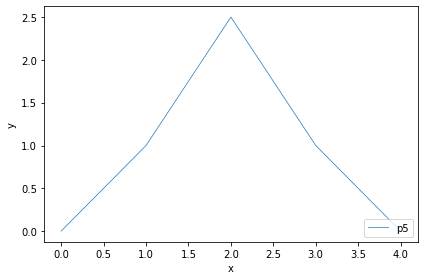

In [9]:
P,Q =np.transpose(X)
fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(P,Q, linewidth = 0.7, label = "p5")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [10]:
np.linalg.norm(b-a)

1.4142135623730951

In [172]:
dHermite(b,c,tb,tc,0.5)

array([-0.37032382,  0.92890272])